1. elite_level_code to average call duration correlation
2. wordcloud of call_transcript
3. agent wise average call duration and comparision
4. customer wise average call duration.--> ❌
5. agent wise + reason wise , call duration segregation
6. primary_call_reason average call time
7. AHT and AST calcultion
8. correlation between silent_percentage and customer_tone
9. relation between customer_tone and agent_tone
10. correlation between call_sentiment and silent_percentage
11. correlation between call_sentiment and call duration
12. correlation between customer tone and ast
13. ast and aht relation


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
cus_df = pd.read_csv('/content/drive/MyDrive/united spy hack-2/customers2afd6ea.csv')
cus_df.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [4]:
calls_df = pd.read_csv("/content/drive/MyDrive/united spy hack-2/callsf0d4f5a.csv")
calls_df.head()


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [5]:
sent_df = pd.read_csv("/content/drive/MyDrive/united spy hack-2/sentiment_statisticscc1e57a.csv")
sent_df.sample(5)

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
39843,5794587817,158319,calm,calm,0.04,0.04
28247,57429997,637585,calm,angry,0.35,0.11
13035,3534805136,349957,neutral,angry,-0.21,0.25
49806,6729174852,436472,neutral,calm,-0.08,0.00
16351,2093920972,607742,neutral,neutral,-0.05,0.24


In [6]:
reasons_df = pd.read_csv("/content/drive/MyDrive/united spy hack-2/reason18315ff.csv")
reasons_df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [7]:
cus_df.shape, calls_df.shape, sent_df.shape, reasons_df.shape

((71810, 3), (71810, 7), (71810, 6), (66653, 2))

In [8]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [9]:
reasons_df.primary_call_reason.value_counts()

,count
primary_call_reason,
IRROPS,13057
Voluntary Change,10291
Seating,6223
Mileage Plus,5487
Post-Flight,3869
Communications,3779
Products and Services,2792
Upgrade,2682
Baggage,2616


In [10]:
calls_df.agent_id.nunique()

383

In [11]:
calls_df["call_start_datetime"]= pd.to_datetime(calls_df["call_start_datetime"])
calls_df["agent_assigned_datetime"]= pd.to_datetime(calls_df["agent_assigned_datetime"])
calls_df["call_end_datetime"]= pd.to_datetime(calls_df["call_end_datetime"])

In [12]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 3.8+ MB


In [13]:
calls_df['waiting_time'] = calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']
calls_df['call_time'] = calls_df['call_end_datetime'] - calls_df['call_start_datetime']

calls_df['waiting_time'] = (calls_df['waiting_time'].dt.total_seconds() / 60).astype(int) #in minutes
calls_df['call_time'] = (calls_df['call_time'].dt.total_seconds() / 60).astype(int)

In [14]:
ast = calls_df['waiting_time'].mean()
aht = calls_df['call_time'].mean()
print(f"Average Speed to Assign {ast}")
print(f"Average Handle time {aht}")

Average Speed to Assign 7.284458988998747
Average Handle time 18.901935663556607


In [15]:
# Merge calls_df with cus_df on customer_id
merged_df = pd.merge(calls_df, cus_df, on='customer_id', how='left')

# Merge the result with sent_id on call_id and agent_id
merged_df = pd.merge(merged_df, sent_df, on=['call_id', 'agent_id'], how='left')

# Merge the result with reasons_df on call_id
merged_df = pd.merge(merged_df, reasons_df, on='call_id', how='left')
merged_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,waiting_time,call_time,customer_name,elite_level_code,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,7,38,Matthew Foster,4.0,neutral,angry,-0.04,0.39,Voluntary Cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,3,15,Tammy Walters,NaN,calm,neutral,0.02,0.35,Booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,8,27,Jeffery Dixon,NaN,neutral,polite,-0.13,0.32,IRROPS
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,5,12,David Wilkins,2.0,neutral,frustrated,-0.20,0.20,Upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,10,19,Elizabeth Daniels,0.0,neutral,polite,-0.05,0.35,Seating


In [16]:
merged_df.isna().sum()

,0
call_id,0
customer_id,0
agent_id,0
call_start_datetime,0
agent_assigned_datetime,0
call_end_datetime,0
call_transcript,0
waiting_time,0
call_time,0
customer_name,0


In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
 7   waiting_time             71810 non-null  int64         
 8   call_time                71810 non-null  int64         
 9   customer_name            71810 non-null  object        
 10  elite_level_code         46043 non-null  float64       
 11  agent_tone               71593 non-null  object        
 12  customer_tone            71810 n

In [18]:
# merged_df.to_csv("merged_df.csv", index=False)
data = merged_df.copy()

In [19]:
# Calculate basic statistics for AHT (call_time) and ASA (waiting_time)
aht_stats = data['call_time'].describe()
asa_stats = data['waiting_time'].describe()

# Get the most frequent and least frequent primary call reasons
call_reason_counts = data['primary_call_reason'].value_counts()

# Calculate the average AHT for the most and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

avg_aht_most_frequent = data[data['primary_call_reason'] == most_frequent_reason]['call_time'].mean()
avg_aht_least_frequent = data[data['primary_call_reason'] == least_frequent_reason]['call_time'].mean()

# Calculate the percentage difference between most and least frequent call reasons
aht_percentage_diff = ((avg_aht_most_frequent - avg_aht_least_frequent) / avg_aht_least_frequent) * 100

aht_stats, asa_stats, most_frequent_reason, least_frequent_reason, avg_aht_most_frequent, avg_aht_least_frequent, aht_percentage_diff


(count    71810.000000
 mean        18.901936
 std         13.079690
 min          3.000000
 25%         11.000000
 50%         15.000000
 75%         22.000000
 max        129.000000
 Name: call_time, dtype: float64,
 count    71810.000000
 mean         7.284459
 std          2.518830
 min          3.000000
 25%          5.000000
 50%          7.000000
 75%          9.000000
 max         15.000000
 Name: waiting_time, dtype: float64,
 'IRROPS',
 'Unaccompanied Minor  ',
 19.094432105384087,
 15.0,
 27.29621403589391)

<ipython-input-20-5f6fc892f5d6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Most Frequent - IRROPS', 'Least Frequent - Unaccompanied Minor'],
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


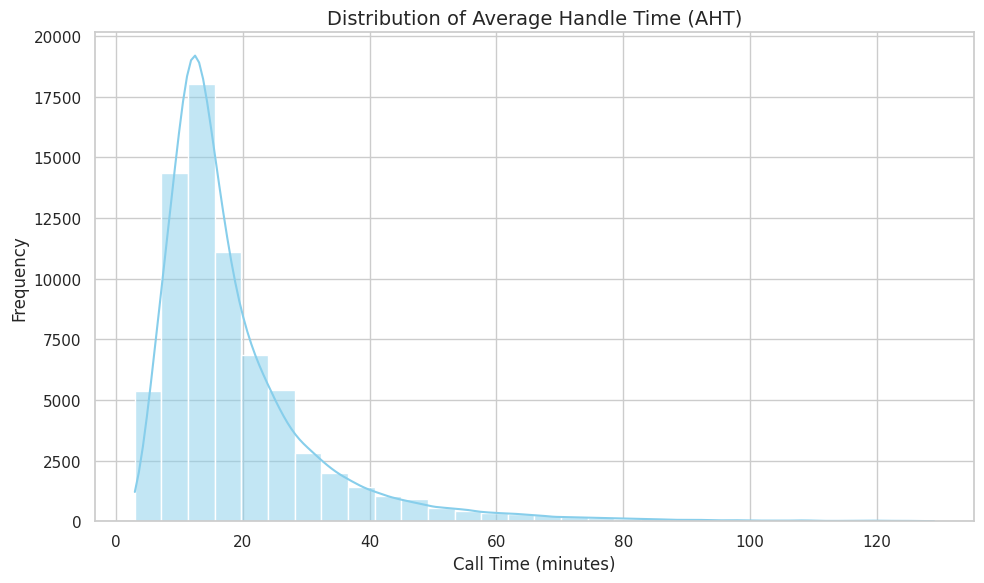

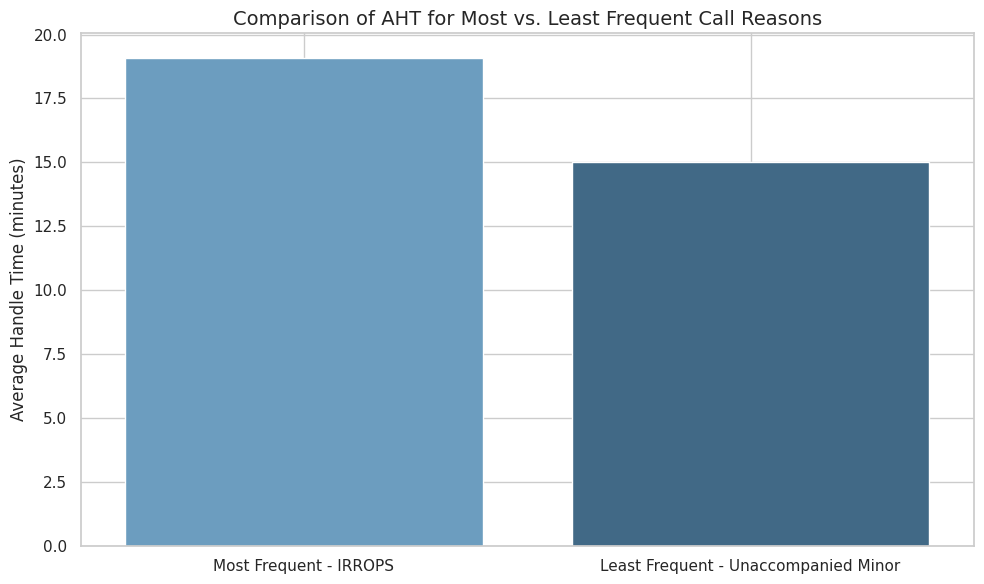

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")

# Plot the distribution of AHT (call_time)
plt.figure(figsize=(10, 6))
sns.histplot(data['call_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Handle Time (AHT)', fontsize=14)
plt.xlabel('Call Time (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Plot comparison of AHT for most and least frequent call reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=['Most Frequent - IRROPS', 'Least Frequent - Unaccompanied Minor'],
            y=[avg_aht_most_frequent, avg_aht_least_frequent], palette='Blues_d')
plt.title('Comparison of AHT for Most vs. Least Frequent Call Reasons', fontsize=14)
plt.ylabel('Average Handle Time (minutes)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plots
plt.show()


In [21]:
# Extracting common issues from call transcripts to identify recurring self-solvable problems.
# Since the transcripts might be lengthy, we will conduct a simple word frequency analysis to capture recurring patterns.

from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing the call transcripts to find common phrases or issues
vectorizer = CountVectorizer(stop_words='english', max_features=20, ngram_range=(1, 2))
transcript_matrix = vectorizer.fit_transform(data['call_transcript'])

# Sum up the counts of each word
word_freq = transcript_matrix.sum(axis=0)
word_freq = [(word, word_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent phrases
word_freq[:10]


[('flight', 631962),
 ('agent', 555458),
 ('customer', 549932),
 ('let', 310728),
 ('change', 248693),
 ('help', 201067),
 ('like', 194177),
 ('thank', 184727),
 ('united', 173306),
 ('calling', 159962)]

In [ ]:
# Import necessary libraries for preprocessing and modeling
#prediction
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function for call transcripts
def preprocess_text(text):
    # Initialize stopwords, lemmatizer, and punctuation removal
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Tokenize and lower the case
    words = word_tokenize(text.lower())

    # Remove stopwords and punctuation, and perform lemmatization
    cleaned_text = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in string.punctuation]
    return ' '.join(cleaned_text)

# Apply preprocessing to the call transcripts
data['cleaned_transcript'] = data['call_transcript'].apply(preprocess_text)

# Split data into train (where primary_call_reason is available) and test (where it's missing)
train_data = data.dropna(subset=['primary_call_reason'])
test_data = data[data['primary_call_reason'].isna()]

# Features (X) and target (y) for training
X = train_data['cleaned_transcript']
y = train_data['primary_call_reason']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a simple Logistic Regression model as a baseline
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_tfidf)

# Evaluate the model performance
classification_report_output = classification_report(y_test, y_pred)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# print(classification_report_output)
X_test_df = pd.DataFrame(X_test, columns=['cleaned_transcript'])

# Combine the cleaned transcripts, actual primary_call_reason (y_test), and predicted values (y_pred)
result_df = pd.DataFrame({
    'cleaned_transcript': X_test_df['cleaned_transcript'],
    'actual_reason': y_test,
    'predicted_reason': y_pred
})

# Display the combined DataFrame
result_df.sample(10)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white',collocations = False)

In [ ]:
cloud = wc.generate(data['cleaned_transcript'].str.cat(sep = ' '))
plt.imshow(cloud)